In [51]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup


%matplotlib inline

import string
import nltk

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

import re
import string
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
import os
from tqdm import tqdm

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
import re

In [52]:
file_path = '/content/foods.txt'

In [53]:
# Initialize an empty list to store dictionaries representing each review
reviews = []

# Read the data from the file and process it
with open(file_path, 'r', encoding='latin-1') as file:
    current_review = {}

    for line in file:
        line = line.strip()
        if line:
            # Check if there is a colon in the line
            if ':' in line:
                key, value = line.split(': ', 1)
                current_review[key] = value
            else:
                # Handle cases where there is no colon
                key = line
                value = None
                current_review[key] = value
        else:
            # Append a copy of the current review to the list
            reviews.append(current_review.copy())
            current_review = {}

# Create a DataFrame from the list of reviews
df = pd.DataFrame(reviews)

# Display the first few rows of the DataFrame
df.head(10)



,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,88 years old. ...,...creative powers b...,School Princi...,I am a voracious reader/li...
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,NaN,NaN,NaN,NaN
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN,NaN,NaN,NaN
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1/1,4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,NaN,NaN,NaN,NaN
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3/3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,NaN,NaN,NaN,NaN
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0/0,5.0,1350777600,Great taffy,Great taffy at a great price. There was a wid...,NaN,NaN,NaN,NaN
5,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0/0,4.0,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,NaN,NaN,NaN,NaN
6,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0/0,5.0,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,NaN,NaN,NaN,NaN
7,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0/0,5.0,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,NaN,NaN,NaN,NaN
8,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1/1,5.0,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,NaN,NaN,NaN,NaN
9,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0/0,5.0,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,NaN,NaN,NaN,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product/productId              568454 non-null  object 
 1   review/userId                  568454 non-null  object 
 2   review/profileName             568454 non-null  object 
 3   review/helpfulness             568454 non-null  object 
 4   review/score                   568454 non-null  object 
 5   review/time                    568454 non-null  object 
 6   review/summary                 568454 non-null  object 
 7   review/text                    568454 non-null  object 
 8   88 years old. ...              0 non-null       float64
 9   ...creative powers b...        0 non-null       float64
 10  School Princi...               0 non-null       float64
 11  I am a voracious reader/li...  0 non-null       float64
dtypes: float64(4), object(8)
memor

In [55]:
df = df.iloc[:, 0:8]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   product/productId   568454 non-null  object
 1   review/userId       568454 non-null  object
 2   review/profileName  568454 non-null  object
 3   review/helpfulness  568454 non-null  object
 4   review/score        568454 non-null  object
 5   review/time         568454 non-null  object
 6   review/summary      568454 non-null  object
 7   review/text         568454 non-null  object
dtypes: object(8)
memory usage: 34.7+ MB


In [56]:
# df['review/time'] = pd.to_numeric(df['review/time'])
# df['review/time'] = pd.to_datetime(df['review/time'], unit='s', origin='unix')

In [57]:
# Split the "Helpfulness" column into two new columns
df[['HelpfulnessNumerator', 'HelpfulnessDenominator']] = df['review/helpfulness'].str.split('/', expand=True)

# Convert the new columns to numeric values
df['HelpfulnessNumerator'] = pd.to_numeric(df['HelpfulnessNumerator'], errors='coerce')
df['HelpfulnessDenominator'] = pd.to_numeric(df['HelpfulnessDenominator'], errors='coerce')

# Drop the original "Helpfulness" column if needed
df.drop('review/helpfulness', axis=1, inplace=True)

df

,product/productId,review/userId,review/profileName,review/score,review/time,review/summary,review/text,HelpfulnessNumerator,HelpfulnessDenominator
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,1
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,0
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,1
3,B000UA0QIQ,A395BORC6FGVXV,Karl,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,3,3
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5.0,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0,0
...,...,...,...,...,...,...,...,...,...
568449,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,5.0,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0,0
568450,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,2.0,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,0,0
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",5.0,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2,2
568452,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",5.0,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,1,1


In [58]:
df['review/score'] = pd.to_numeric(df['review/score'])
df.head()

,product/productId,review/userId,review/profileName,review/score,review/time,review/summary,review/text,HelpfulnessNumerator,HelpfulnessDenominator
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,1
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,0
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,1
3,B000UA0QIQ,A395BORC6FGVXV,Karl,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,3,3
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5.0,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0,0


In [59]:
# Creating the partition function returning the positive or negative reviews and appending them in the Score column in place
# of ratings given:

def partition(x):
        if x < 3:
            return 0
        else :
          return 1
pos_neg_reviews_df = df['review/score'].map(partition)
df['PositiveNegative'] = pos_neg_reviews_df
df.head()

,product/productId,review/userId,review/profileName,review/score,review/time,review/summary,review/text,HelpfulnessNumerator,HelpfulnessDenominator,PositiveNegative
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,1,1
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,0,0
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,1,1
3,B000UA0QIQ,A395BORC6FGVXV,Karl,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,3,3,0
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5.0,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0,0,1


In [60]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Reset the index after dropping duplicates
df.reset_index(drop=True, inplace=True)
df.shape

(568173, 10)

In [61]:
duplicated_data = df.duplicated(subset={'review/userId','review/profileName','review/time','review/summary','review/text'} , keep='first')
duplicated_data = pd.DataFrame(duplicated_data , columns=['Boolean'])
print(duplicated_data.head(5))

   Boolean
0    False
1    False
2    False
3    False
4    False


In [62]:
print(duplicated_data['Boolean'].value_counts(dropna=False))
#dropping the duplicates:
final = df.sort_values(by='product/productId',kind='quicksort',ascending=True,inplace=False)
final = final.drop_duplicates(subset={'review/userId','review/profileName','review/time','review/text'} , keep='first', inplace=False)
print('\n','DataFrame final shape before removing helpfullness data :', final.shape)

#Also removing the instances where HelpfulnessNumerator >= HelpfulnessDenominator:
final = final[final['HelpfulnessNumerator'] <= final['HelpfulnessDenominator']]
print('final', final.shape)

False    395172
True     173001
Name: Boolean, dtype: int64

 DataFrame final shape before removing helpfullness data : (393933, 10)
final (393931, 10)


In [63]:
final.columns

Index(['product/productId', 'review/userId', 'review/profileName',
       'review/score', 'review/time', 'review/summary', 'review/text',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'PositiveNegative'],
      dtype='object')

In [64]:
#Finding the books data in the amazon_featured_reviews using the regex:
import re
print(final.columns)
def analyzing_summary_book(filtered_data , regex):

    mask_summary = filtered_data['review/summary'].str.lower().str.contains(regex)
    mask_text = filtered_data['review/text'].str.lower().str.contains(regex)
    print(len(filtered_data[mask_summary].index) , len(filtered_data[mask_text].index))
    print('initial shape of the filtered_data' , filtered_data.shape)
    filtered_data.drop(filtered_data[mask_summary].index , inplace=True , axis=0)
    filtered_data.drop(filtered_data[mask_text].index , axis=0 , inplace=True)

Index(['product/productId', 'review/userId', 'review/profileName',
       'review/score', 'review/time', 'review/summary', 'review/text',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'PositiveNegative'],
      dtype='object')


In [65]:
#Removing the Books reviews
#On observation of some of the reviews, got certain keywords related to books,  reading, poems, story, learn, study, music
#removed these words as much as possible:


print('final shape before removing books reviews:' , final.shape)
analyzing_summary_book(final , re.compile(r'reading|books|book|read|study|learn|poems|music|story'))

print('final shape after removing the book reviews:' , final.shape)

#Computing the proportion of positive and negative class labels in the DataFrame:
final['PositiveNegative'].value_counts()

final shape before removing books reviews: (393931, 10)
3008 39779
initial shape of the filtered_data (393931, 10)
final shape after removing the book reviews: (353376, 10)


1    303239
0     50137
Name: PositiveNegative, dtype: int64

In [66]:
final = final.dropna()

final.shape

(353376, 10)

In [67]:
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
# nltk.download('stopwords')
stop = stopwords.words('english')
print(stop)
print('\n' , 'length of stopwords set' , len(stop))

print("*" * 30)



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [68]:
def decontracted(phrase):  # this function expands english language contraction such as (that's) to ('that is')
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


In [69]:
## Preprocessing 'Text' column
# The Below code removes url's , html tags, words with numbers, special character, stopwords and decontracts words in the Text for each review

preprocessed_reviews = []
for sentance in tqdm(final['review/text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stop)
    preprocessed_reviews.append(sentance.strip())

100%|██████████| 353376/353376 [03:46<00:00, 1560.43it/s]


In [70]:
# Preprocessing Summary column
# The Below code removes url's , html tags, words with numbers, special character, stopwords and decontracts words in the Summary for each review

preprocessed_Summary = []
# tqdm is for printing the status bar
for sentance in tqdm(final['review/summary'].values):
    sentance = re.sub(r"http\S+", "", str(sentance))
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stop)
    preprocessed_Summary.append(sentance.strip())

100%|██████████| 353376/353376 [01:53<00:00, 3115.74it/s]


In [71]:
# let's replace the 'Summary' and 'Text' column with the preprocessed data.
final["review/summary"] = preprocessed_Summary
final['review/text'] = preprocessed_reviews
final.drop(['review/userId', 'product/productId', 'review/profileName'], axis = 1, inplace=True)  # not considering these columns for classification.

In [72]:
final.reset_index(inplace=True)
final

,index,review/score,review/time,review/summary,review/text,HelpfulnessNumerator,HelpfulnessDenominator,PositiveNegative
0,515159,5.0,1332547200,best drink mix,product archer farms best drink mix ever mix f...,1,1,1
1,24741,2.0,1192060800,made china,dogs loves chicken product china wont buying a...,1,1,0
2,24742,5.0,1195948800,dog lover delites,dogs love saw pet store tag attached regarding...,0,0,1
3,171085,1.0,1317859200,review freeze dried liver treats dogs,received containers previously opened seals op...,3,6,0
4,171086,3.0,1278374400,satisfactory,bought freeze dried liver half container fille...,3,7,1
...,...,...,...,...,...,...,...,...
353371,193067,5.0,1350432000,yay dextrose,packets powdered sweeteners usually little dex...,0,0,1
353372,193068,5.0,1350432000,sweetener choice,wonderful product perfect use baking anything ...,0,0,1
353373,193057,5.0,1350432000,would use sweetener,using fat skinny zero sweetener almost year sw...,1,1,1
353374,188282,5.0,1350518400,amazing great sauce everything,try sauce believe starts little sweet honey ta...,0,0,1


In [73]:
final.drop(['index'], axis=1, inplace=True)
final.head()

,review/score,review/time,review/summary,review/text,HelpfulnessNumerator,HelpfulnessDenominator,PositiveNegative
0,5.0,1332547200,best drink mix,product archer farms best drink mix ever mix f...,1,1,1
1,2.0,1192060800,made china,dogs loves chicken product china wont buying a...,1,1,0
2,5.0,1195948800,dog lover delites,dogs love saw pet store tag attached regarding...,0,0,1
3,1.0,1317859200,review freeze dried liver treats dogs,received containers previously opened seals op...,3,6,0
4,3.0,1278374400,satisfactory,bought freeze dried liver half container fille...,3,7,1


In [74]:
final.drop(['review/score'], axis=1, inplace=True)
final.head()

,review/time,review/summary,review/text,HelpfulnessNumerator,HelpfulnessDenominator,PositiveNegative
0,1332547200,best drink mix,product archer farms best drink mix ever mix f...,1,1,1
1,1192060800,made china,dogs loves chicken product china wont buying a...,1,1,0
2,1195948800,dog lover delites,dogs love saw pet store tag attached regarding...,0,0,1
3,1317859200,review freeze dried liver treats dogs,received containers previously opened seals op...,3,6,0
4,1278374400,satisfactory,bought freeze dried liver half container fille...,3,7,1


Encoding Text and Summary features using BOW (bag of words)


In [75]:
# seperating the class column from the dataset
y = final['PositiveNegative'].values
X = final.drop(['PositiveNegative'], axis=1)

# splitting the data and class labels in to train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [76]:
print('train data shape', X_train.shape)
print('train data labels shape ', y_train.shape)
print('test data shape', X_test.shape)
print('test data labels shape', y_test.shape)

train data shape (236761, 5)
train data labels shape  (236761,)
test data shape (116615, 5)
test data labels shape (116615,)


In [77]:
### Text feature
# calling the CountVectorizer class with three parameters
vectorizer = CountVectorizer(min_df=10, ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['review/text'].values) # fitting the model with train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_text = vectorizer.transform(X_train['review/text'].values)
X_test_text = vectorizer.transform(X_test['review/text'].values)

# getting the features
features_text = vectorizer.get_feature_names_out() # we will be using this afterwords

print("After vectorizations using BOW")
print(X_train_text.shape, y_train.shape)
print(X_test_text.shape, y_test.shape)

After vectorizations using BOW
(236761, 5000) (236761,)
(116615, 5000) (116615,)


In [78]:
### Summary feature
# calling the CountVectorizer class with three parameters
vectorizer = CountVectorizer(min_df=10, ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['review/summary'].values) # fitting the model with train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_summary = vectorizer.transform(X_train['review/summary'].values)
X_test_summary = vectorizer.transform(X_test['review/summary'].values)

# getting the features of bow vectorization
features_summary = vectorizer.get_feature_names_out() # we will be using this afterwords

print("After vectorizations using BOW")
print(X_train_summary.shape, y_train.shape)
print(X_test_summary.shape, y_test.shape)

After vectorizations using BOW
(236761, 5000) (236761,)
(116615, 5000) (116615,)


Encoding nemurical features

In [79]:
### "HelpfulnessNumerator" feature

helpfulness_train = X_train[['HelpfulnessNumerator']]
helpfulness_test = X_test[['HelpfulnessNumerator']]
normalizer = Normalizer() # normalizing numerical features such that all numerical features are in same range.

normalizer.fit(X_train['HelpfulnessNumerator'].values.reshape(-1,1))

X_train_help_num_norm = normalizer.transform(helpfulness_train)
X_test_help_num_norm = normalizer.transform(helpfulness_test)


print("After normalization of price feature")
print(X_train_help_num_norm.shape, y_train.shape)
print(X_test_help_num_norm.shape, y_test.shape)
print("="*100)

After normalization of price feature
(236761, 1) (236761,)
(116615, 1) (116615,)


In [84]:
### "HelpfulnessDenumerator" feature

helpfulness_train = X_train[['HelpfulnessDenominator']]
helpfulness_test = X_test[['HelpfulnessDenominator']]
normalizer = Normalizer() # normalizing numerical features such that all numerical features are in same range.

normalizer.fit(X_train['HelpfulnessDenominator'].values.reshape(-1,1))

X_train_help_den_norm = normalizer.transform(helpfulness_train)
X_test_help_den_norm = normalizer.transform(helpfulness_test)


print("After normalization of price feature")
print(X_train_help_den_norm.shape, y_train.shape)
print(X_test_help_den_norm.shape, y_test.shape)
print("="*100)

After normalization of price feature
(236761, 1) (236761,)
(116615, 1) (116615,)


In [85]:
# "Time" feature
helpfulness_train = X_train[['review/time']]  # Keep it as DataFrame
helpfulness_test = X_test[['review/time']]    # Keep it as DataFrame

# Create a Normalizer
normalizer = Normalizer()

# Fit and transform on the training set
X_train_help_time_norm = normalizer.fit_transform(helpfulness_train)

# Transform on the testing set using the parameters learned from the training set
X_test_help_time_norm = normalizer.transform(helpfulness_test)

# Print the shapes after normalization
print("After normalization of HelpfulnessNumerator feature")
print(X_train_help_num_norm.shape, y_train.shape)
print(X_test_help_num_norm.shape, y_test.shape)
print("=" * 100)

After normalization of HelpfulnessNumerator feature
(236761, 1) (236761,)
(116615, 1) (116615,)


In [86]:
# merge two sparse matrices
from scipy.sparse import hstack

X_tr = hstack((X_train_text, X_train_summary, X_train_help_num_norm,  # train data after BOW representation for 'Text' and 'Summary' feature.
                   X_train_help_den_norm, X_train_help_time_norm)).tocsr()

X_te = hstack((X_test_text, X_test_summary, X_test_help_num_norm,  # test data after BOW representation for 'Text' and 'Summary' feature.
                   X_test_help_den_norm, X_test_help_time_norm)).tocsr()


print("Final Data matrix with BOW representation for essay")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix with BOW representation for essay
(236761, 10003) (236761,)
(116615, 10003) (116615,)


Training the Multinomial naive bayes Model

In [87]:
# using grid search for finding the best alpha for laplace smoothing/additive smoothing
from sklearn.model_selection import GridSearchCV

NB_classifier = MultinomialNB(class_prior=[0.5, 0.5])

parameters = {'alpha': [0.001, 0.05, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10, 20, 25, 30, 50, 70, 100]}  # various values of alhap's to choose from.
clf = GridSearchCV(NB_classifier, parameters, cv=5, scoring='roc_auc', return_train_score=True)  # gridsearchCV with 5 fold cross validation .
clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

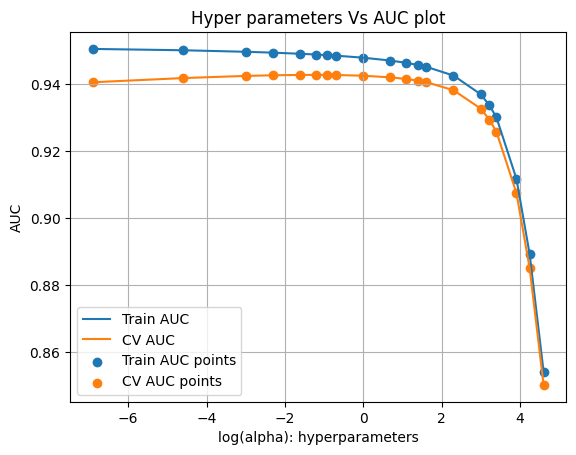

In [88]:
cv_auc = results['mean_test_score']      # mean test scores for every 'alpha'
train_auc = results['mean_train_score']  # mean train scores for every 'alpha

alpha =  list(results['param_alpha'])
alpha=np.log(alpha)   # taking log of alphas so to make the plot more readable

plt.plot(alpha, train_auc, label='Train AUC')
plt.plot(alpha, cv_auc, label='CV AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log(alpha): hyperparameters")
plt.ylabel("AUC")
plt.title("Hyper parameters Vs AUC plot")
plt.grid()
plt.show()

In [89]:
clf.best_estimator_ # using this estimator lets predict the labels of test dataset

MultinomialNB(alpha=0.3, class_prior=[0.5, 0.5])

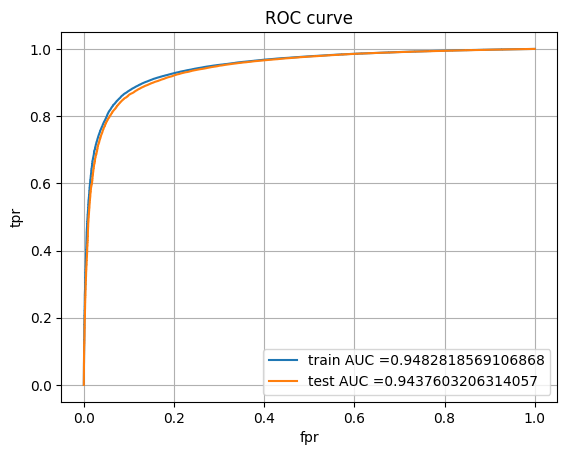

In [90]:
NBclassifier = MultinomialNB(alpha=0.2, class_prior=[0.5, 0.5], fit_prior=True)
NBclassifier.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = NBclassifier.predict_proba(X_tr)[:,1]     # predicted probabilities of train datapoints belonging to positive class
y_test_pred = NBclassifier.predict_proba(X_te)[:,1]      # predicted probabilities of test datapoints belonging to positive class

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)   # fpr and tpr for train data
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)       # fpr and tpr for test data

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC curve")
plt.grid()
plt.show()

In [91]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [92]:
from sklearn.metrics import confusion_matrix

best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)  # getting the best threshold for separating the positive classes form negative

test_confusion_matrix = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))  # calculates the confusion matrix

the maximum value of tpr*(1-fpr) 0.7886291347441186 for threshold 0.639


Test confusion matrix


<Axes: >

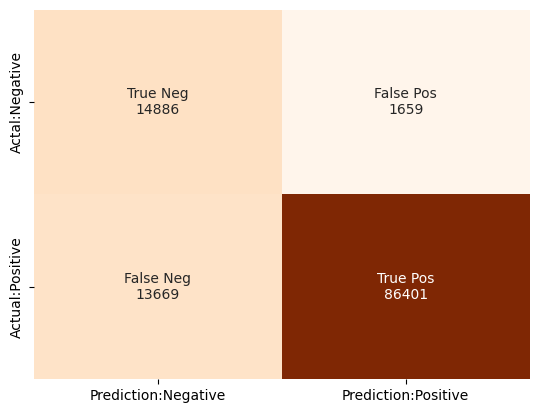

In [94]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                test_confusion_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

print("Test confusion matrix")
sns.heatmap(test_confusion_matrix, annot=labels, fmt='', cmap='Oranges',cbar=False, xticklabels=['Prediction:Negative', 'Prediction:Positive'], yticklabels=['Actal:Negative', 'Actual:Positive'])

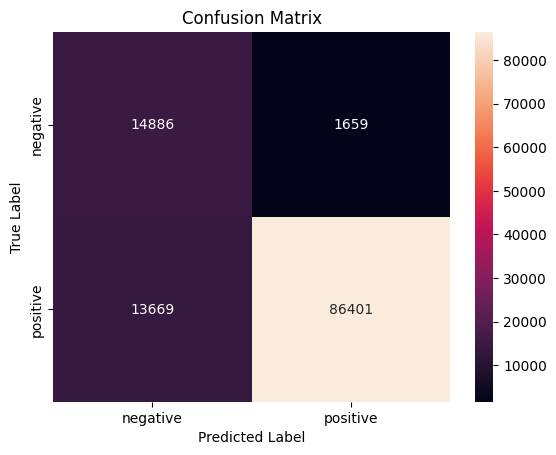

In [95]:
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(test_confusion_matrix, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [195]:
features_text = np.array(features_text)
features_summary = np.array(features_summary)
help_norm = np.array('HelpfulnessNumerator')
help_den = np.array('HelpfulnessDenominator')
time = np.array('review/time')

list_of_features = np.hstack((features_text, features_summary, help_norm,help_den, time))



In [196]:
# Top 20 features form positive class
features = np.argsort(NBclassifier.feature_log_prob_[1]) # sorting the features log probability for potsitive class
                                                             #  form low probability to high probability and getting its indice

features = features[::-1]  # reversing it form high probability to low probability indice
for i in features[3:23]:  # printing top 20 features from positive class
    print(list_of_features[i])

like
good
great
taste
one
flavor
coffee
product
would
tea
love
get
really
food
much
amazon
use
great
best
little


In [197]:
# Top 20 features form negative class
features = np.argsort(NBclassifier.feature_log_prob_[0]) # sorting the features log probability for negtive class
                                                             #  form low probability to high probability and getting its indice

features = features[::-1]  # reversing it form high probability to low probability indice

for i in features[3:23]:  # printing top 20 features from negative calss
    print(list_of_features[i])

like
taste
product
would
one
good
flavor
coffee
tea
get
even
buy
amazon
food
much
really
box
could
tried
bought



Summary:

The Naive Bayes model, known for its swift training, operates under the assumption of feature independence.


By utilizing Bag-of-Words (BOW) representation on both 'review/text' and 'reveiw/summary' features and implementing a Multinomial Naive Bayes model, attained an impressive AUC score of 0.96 for the test data.

Upon scrutinizing the confusion matrix, the model demonstrates commendable performance in discerning positive reviews from negative ones. Nevertheless, it does exhibit a tendency to misclassify certain positive reviews as negative, potentially attributed to the class distribution imbalance.